In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report, roc_auc_score, recall_score, f1_score, precision_score, log_loss
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import joblib


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
warnings.filterwarnings("ignore")

#Read data

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Data overview

In [4]:
df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
cols = df.columns
cols

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Data cleaning

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [8]:
df["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [9]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [10]:
df.loc[df['gender'] == "Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [11]:
df = df.drop(df[df['gender'] == 'Other'].index)

In [12]:
df["work_type"].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [13]:
df["Residence_type"].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [14]:
df.rename(columns = {
    "Residence_type" : "residence_type"
} , inplace = True)

# EDA

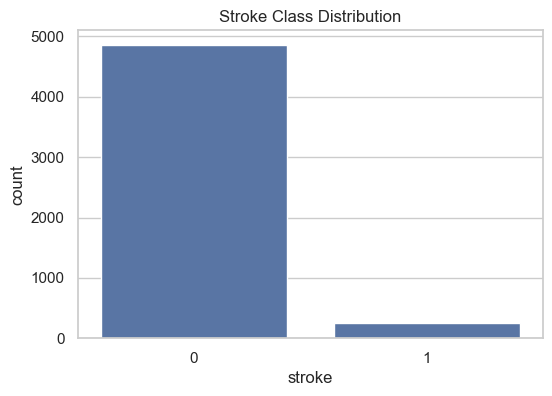

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df)
plt.title('Stroke Class Distribution')
plt.savefig('stroke_class_distribution.png')
plt.show()

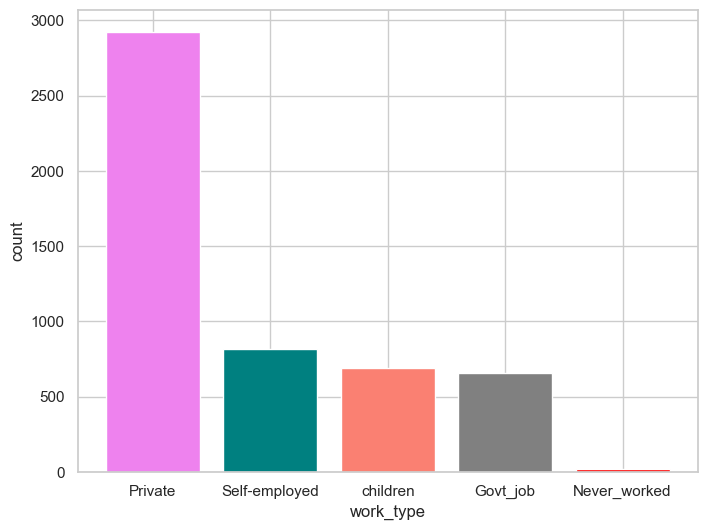

In [16]:
work_type_counts = df["work_type"].value_counts()

plt.figure(figsize = (8,6))
plt.bar(work_type_counts.index , work_type_counts.values,
        color = ['violet', 'teal', 'salmon', 'gray', 'red']) # Changed colors to color
plt.xlabel("work_type")
plt.ylabel("count")
plt.show()

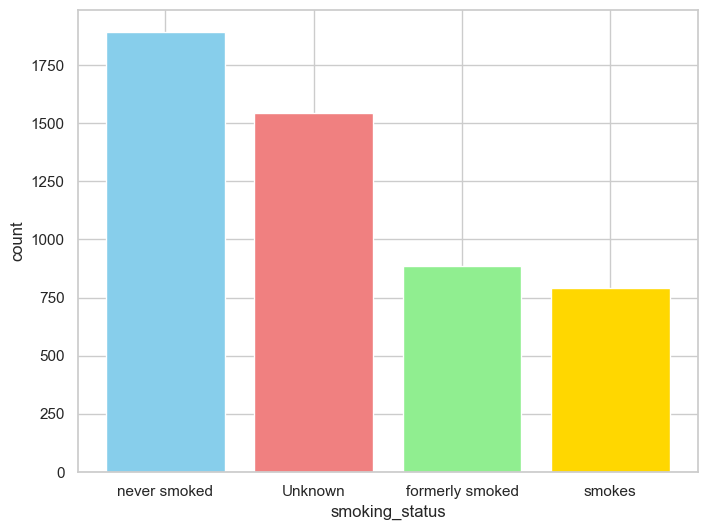

In [17]:
smoking_status_counts = df["smoking_status"].value_counts()

plt.figure(figsize=(8,6))
plt.bar(smoking_status_counts.index , smoking_status_counts.values ,
        color = ['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel("smoking_status")
plt.ylabel("count")
plt.show()

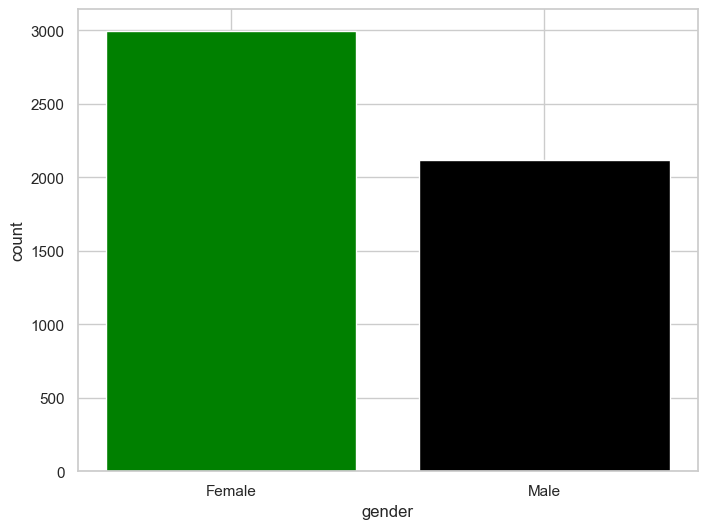

In [18]:
gender_counts = df["gender"].value_counts()

plt.figure(figsize=(8,6))
plt.bar(gender_counts.index , gender_counts.values , color =['green', 'black', 'blue'])
plt.xlabel("gender")
plt.ylabel("count")
plt.show()

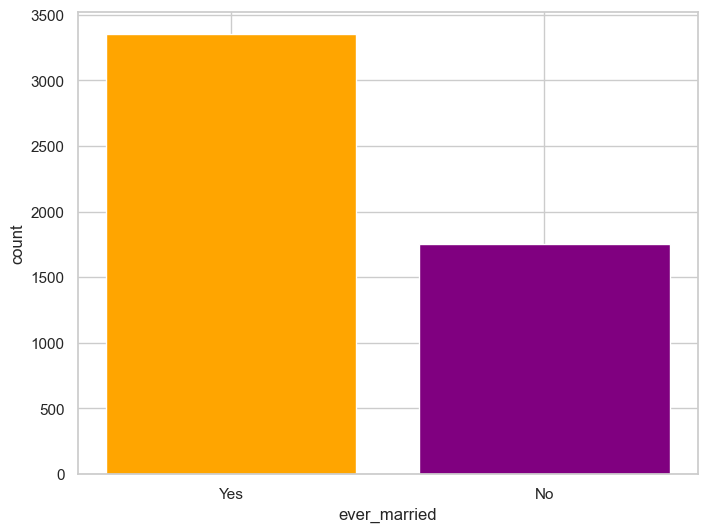

In [19]:
ever_married_count = df["ever_married"].value_counts()

plt.figure(figsize=(8,6))
plt.bar(ever_married_count.index ,ever_married_count.values , color = ['orange', 'purple'])
plt.xlabel("ever_married")
plt.ylabel("count")
plt.show()

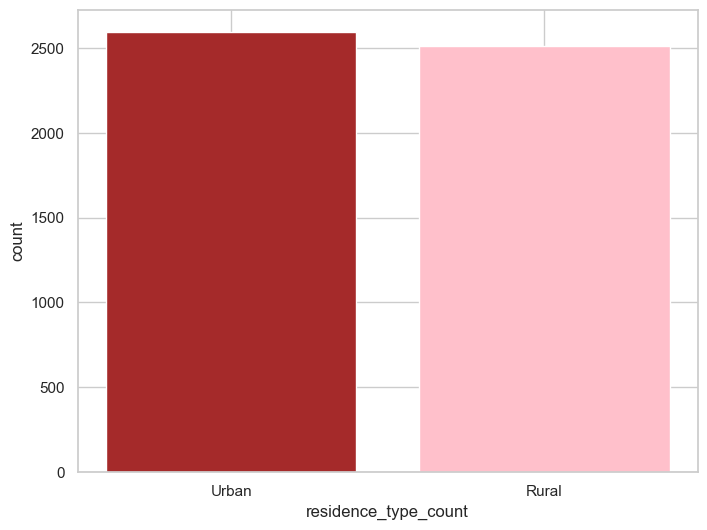

In [20]:
residence_type_count = df["residence_type"].value_counts()

plt.figure(figsize=(8,6))
plt.bar(residence_type_count.index , residence_type_count.values , color = ['brown', 'pink'] )
plt.xlabel("residence_type_count")
plt.ylabel("count")
plt.show()

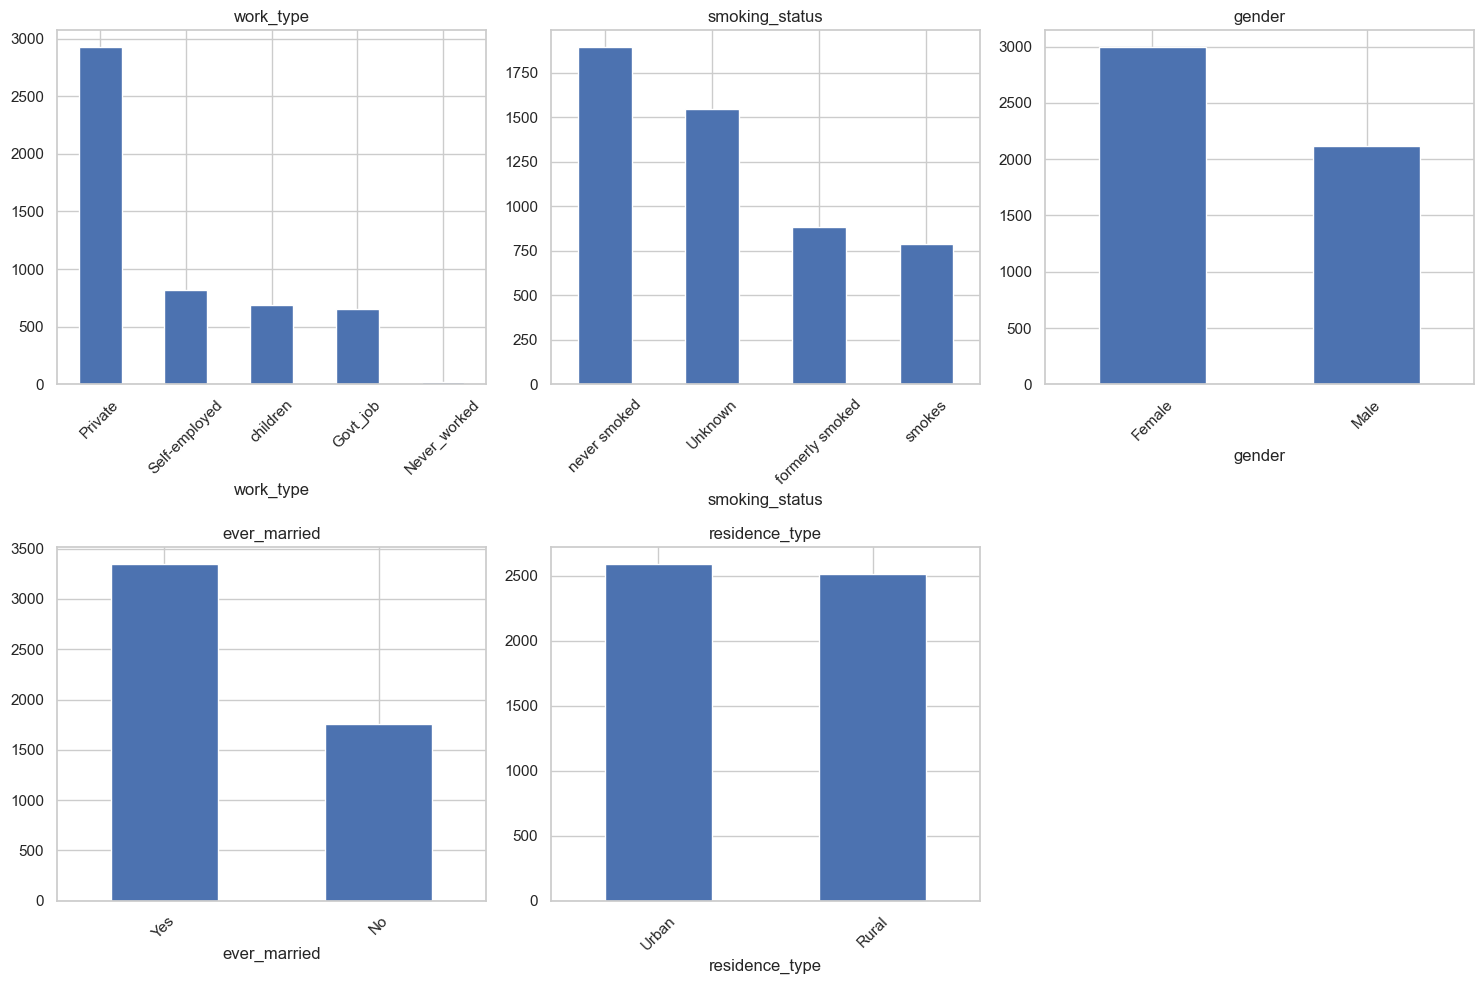

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
categorical_columns = ['work_type', 'smoking_status', 'gender', 'ever_married', 'residence_type']

# Cài đặt số hàng và cột trong biểu đồ tổng hợp
plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_columns):
    plt.subplot(2, 3, i + 1)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.savefig('categorical_columns_distribution.png')
plt.show()

count    5109.000000
mean       43.229986
std        22.613575
min         0.080000
5%          5.000000
10%        11.000000
20%        20.000000
30%        30.000000
40%        38.000000
50%        45.000000
60%        51.000000
70%        57.000000
80%        65.000000
90%        75.000000
95%        79.000000
99%        82.000000
max        82.000000
Name: age, dtype: float64


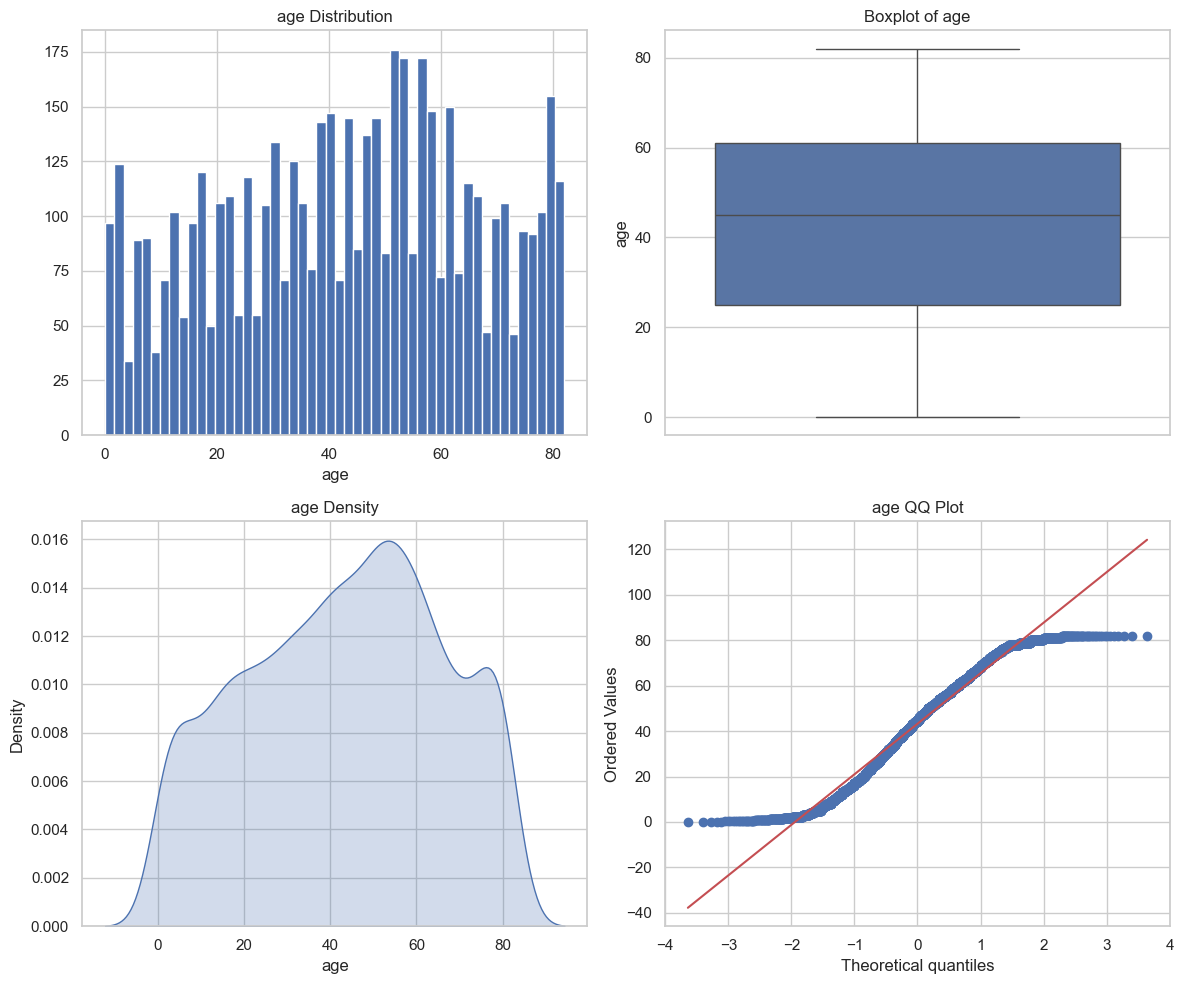

#####################################
count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
5%         60.712000
10%        65.788000
20%        73.760000
30%        80.026000
40%        85.600000
50%        91.880000
60%        98.908000
70%       108.510000
80%       124.142000
90%       192.202000
95%       216.304000
99%       240.708400
max       271.740000
Name: avg_glucose_level, dtype: float64


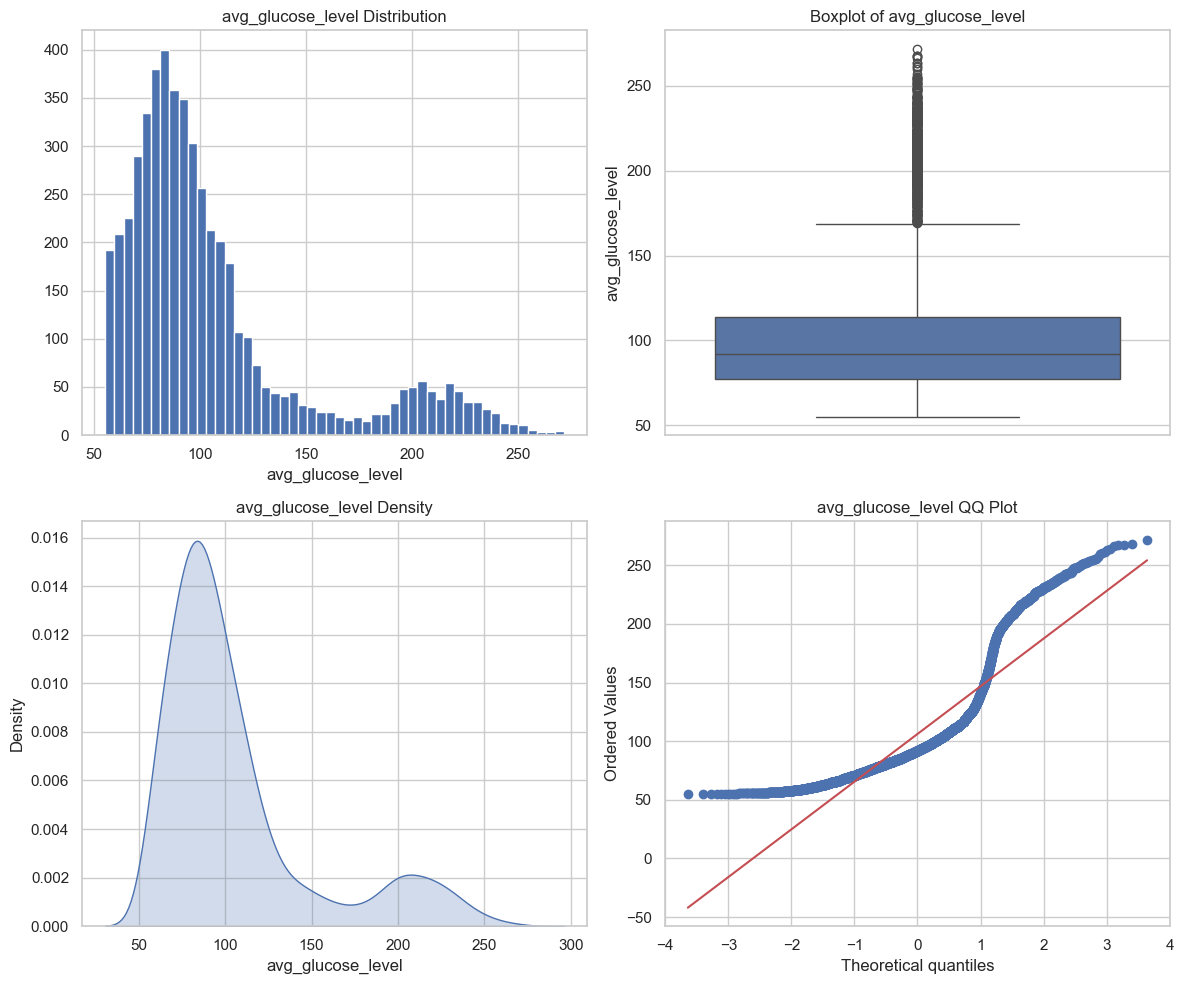

#####################################
count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
5%         17.63500
10%        19.70000
20%        22.50000
30%        24.50000
40%        26.40000
50%        28.10000
60%        29.80000
70%        31.90000
80%        34.50000
90%        38.90000
95%        42.96500
99%        53.40000
max        97.60000
Name: bmi, dtype: float64


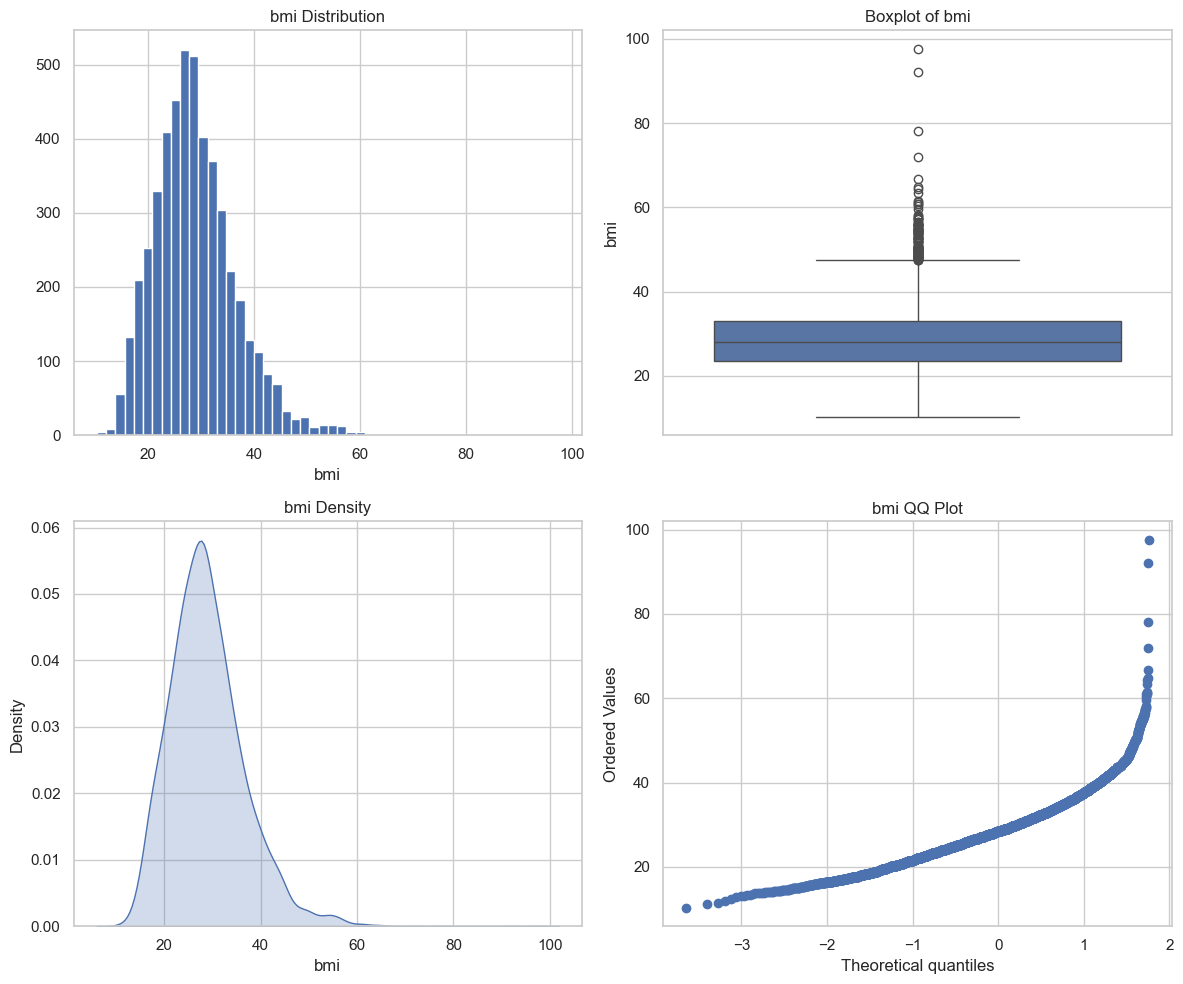

#####################################


In [22]:

selected_numeric_cols = ['age', 'avg_glucose_level', 'bmi']
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))

        # Histogram
        plt.subplot(2, 2, 1)
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + ' Distribution')

        # Boxplot
        plt.subplot(2, 2, 2)
        sns.boxplot(y=numerical_col, data=dataframe)
        plt.title("Boxplot of " + numerical_col)
        plt.xticks(rotation=90)

        # Density Plot
        plt.subplot(2, 2, 3)
        sns.kdeplot(dataframe[numerical_col], shade=True)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + ' Density')

        # QQ Plot
        plt.subplot(2, 2, 4)
        # The 'stats' module is now imported and available
        stats.probplot(dataframe[numerical_col], dist="norm", plot=plt)
        plt.title(numerical_col + ' QQ Plot')

        plt.tight_layout()
        plt.show(block=True)

    print("#####################################")

# Changed 'num_cols' to 'numeric_cols'
for col in selected_numeric_cols:
    num_summary(df, col, plot=True)

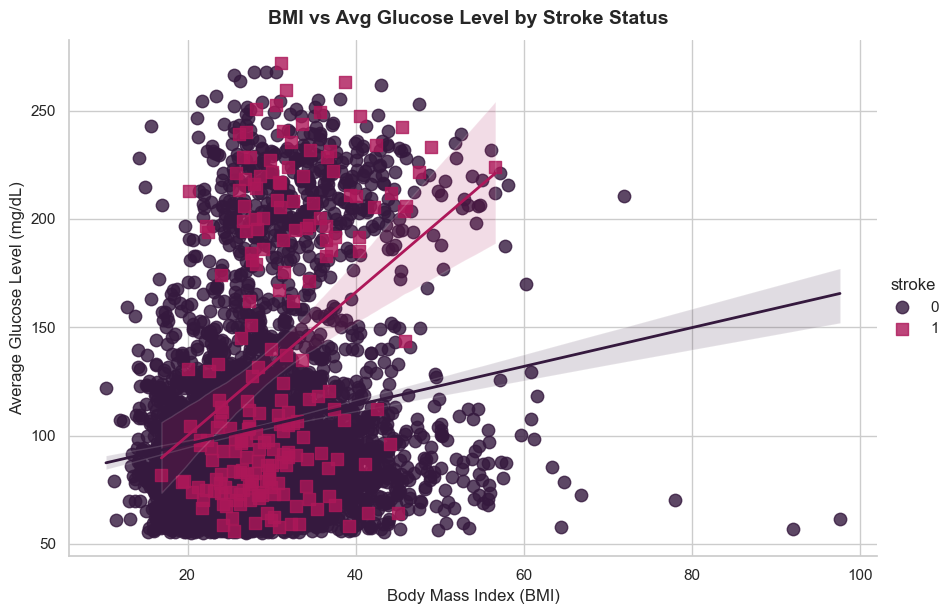

In [23]:

palette = {0: '#35193e', 1: '#ad1759'}

g = sns.lmplot(
    data=df,
    x='bmi',
    y='avg_glucose_level',
    hue='stroke',
    height=6,
    aspect=1.5,
    markers=['o', 's'],
    palette=palette,
    scatter_kws={'s': 80, 'alpha': 0.8},
    line_kws={'linewidth': 2}
)

g.set_axis_labels("Body Mass Index (BMI)", "Average Glucose Level (mg/dL)", fontsize=12)
g.fig.suptitle("BMI vs Avg Glucose Level by Stroke Status", y=1.02, fontsize=14, weight='bold')

plt.show()

# Data preprocessing

In [24]:
def outlier_thresholds(dataframe, col_name, q1=0.02, q3=0.98):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    # print(f"here are quartile1 - quartile3 - interquantile_range - uplimit - lowlimit {quartile1} - {quartile3} - {interquantile_range} - {up_limit} - {low_limit}")
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [25]:
# Identify numerical columns
numeric_cols = [col for col in selected_numeric_cols if col not in ['hypertension', 'heart_disease', 'stroke', 'id']]

# Fill missing values only in numerical columns with the mean of those columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [26]:
# Identify numerical and categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print(df.head())
# Handle outliers for numerical columns
print("Handling outliers for numerical columns:")
for col in numeric_cols:
    print(f"Checking column: {col}")
    if check_outlier(df, col):
        print(f"Outliers found in {col}. Replacing with thresholds.")
        replace_with_thresholds(df, col)
    else:
        print(f"No significant outliers found in {col} based on thresholds.")

print("\nHandling for categorical columns:")
# For categorical columns, outlier handling with quantile-based methods is not appropriate.
# You would typically handle infrequent categories or other forms of "outliers" differently.
for col in categorical_cols:
    print(f"Column '{col}' is categorical. Outlier handling with numerical thresholds is not applicable here.")

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
Handling outliers for numerical columns:
Checking column

In [27]:
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

In [28]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

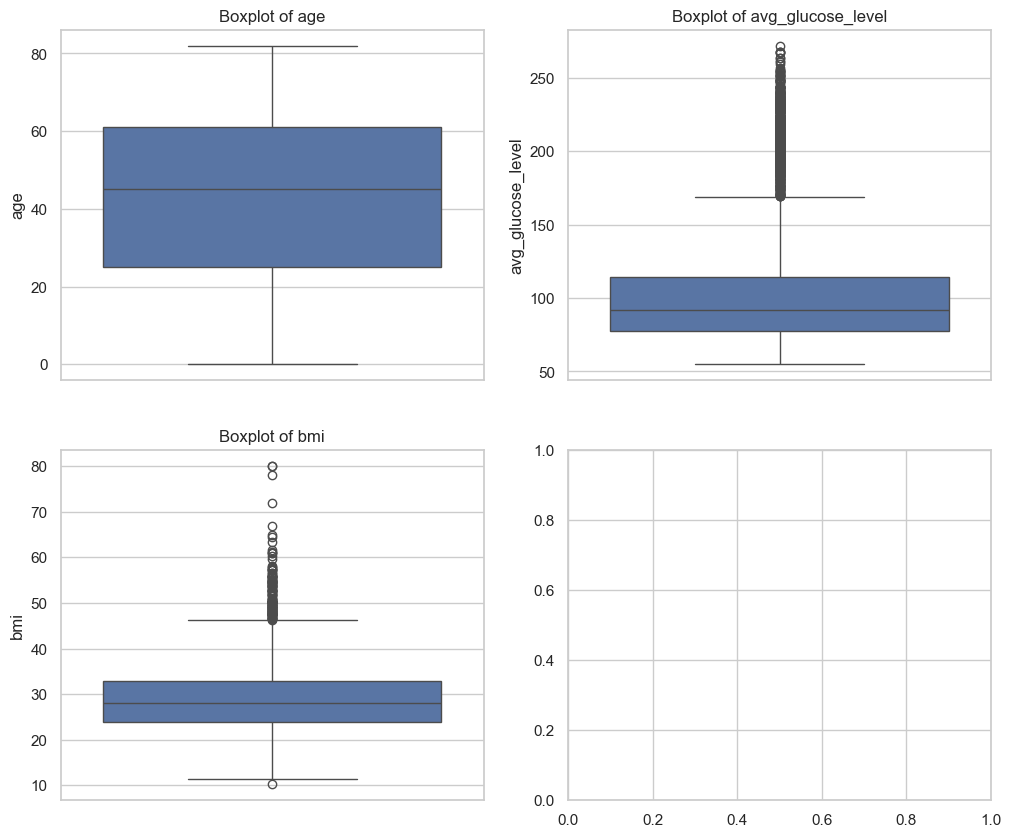

In [29]:

selected_numeric_cols = ['age', 'avg_glucose_level', 'bmi']
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram
plt.subplot(2, 2, 1)
sns.boxplot(y='age', data=df)
plt.title("Boxplot of " + 'age')
plt.xticks(rotation=90)

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y='avg_glucose_level', data=df)
plt.title("Boxplot of " + 'avg_glucose_level')
plt.xticks(rotation=90)

# Density Plot
plt.subplot(2, 2, 3)
sns.boxplot(y='bmi', data=df)
plt.title("Boxplot of " + 'bmi')
plt.xticks(rotation=90)

plt.show(block=True)


# Changed 'num_cols' to 'numeric_cols'


Dữ liệu sau khi encode cột phân loại:


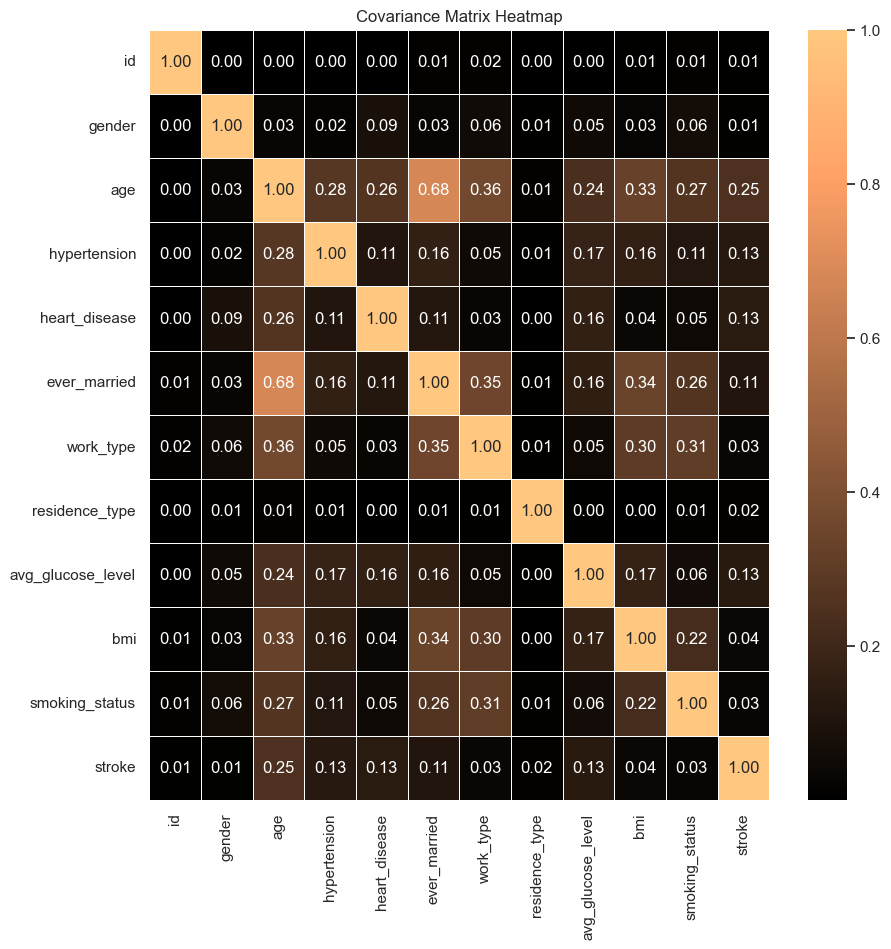

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
scaler= StandardScaler()
vf=df.copy()
df_encoded = vf.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
print("Dữ liệu sau khi encode cột phân loại:")
# print(df_encoded.head())
# print(df_encoded.info())
# print(df_encoded.describe())
training_dataup = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)
cov_matrix = abs(training_dataup.cov())
plt.figure(figsize=(10, 10))
sns.heatmap(cov_matrix, annot=True, cmap='copper', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.savefig('covariance_matrix_heatmap.png')
plt.show()

# Feature engineering


In [31]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Feature Engineering
# Tạo các đặc trưng mới trước khi chọn lọc
df_fe = df.copy()

print(df.head())
# Cập nhật selected_features để bao gồm các đặc trưng mới
selected_features = ['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'
                ]
df = df_fe[selected_features]
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

# Defining categorical and numerical columns
categorical_cols = ['gender', 'smoking_status']
numerical_cols = [col for col in df.columns if col not in categorical_cols + ['stroke']]

# Preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Scaling numerical data
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combining both in a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Fit and transform the data
X = df.drop('stroke', axis=1)
y = df['stroke']
print(df.head())
X_processed = preprocessor.fit_transform(X)

joblib.dump(preprocessor, 'preprocessor.joblib')
# In đầu ra để kiểm tra
df.head()

df.to_csv('train.csv', index=False)

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
   gender   age  hypertension  heart_disease  avg_glucos

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   avg_glucose_level  5109 non-null   float64
 5   bmi                5109 non-null   float64
 6   smoking_status     5109 non-null   object 
 7   stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 359.2+ KB


# Train models

In [33]:
def save_model(self, filepath):
    joblib.dump(self, filepath)

@classmethod
def load_model(cls, filepath):
    return joblib.load(filepath)


In [86]:
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import pandas as pd
import numpy as np

df2 = pd.concat([X_test, pd.Series(y_test, name='stroke')], axis=1)
df2.to_csv('test.csv', index=False)



In [77]:
from imblearn.over_sampling import SMOTE
# Fit and transform the data
X = df.drop('stroke', axis=1)
y = df['stroke']
X_processed = preprocessor.fit_transform(X)

# 4. Tách dữ liệu
smote = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Chuẩn hóa dữ liệu với MinMaxScaler
scaler_normal = MinMaxScaler()
X_train = scaler_normal.fit_transform(X_train)
X_test = scaler_normal.transform(X_test)
joblib.dump(scaler_normal, 'scaler.joblib')
df2 = pd.DataFrame(X_test, y_test)
df2.to_csv('test.csv', index=False)

In [35]:
def gini_impurity(y):
    """
    Tính Gini Impurity cho tập nhãn y (dùng trong bài toán phân loại).
    y: mảng nhãn (numpy array hoặc list).
    """
    if len(y) == 0:
        return 0
    # Đếm tỷ lệ mỗi lớp
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    # Công thức Gini: 1 - sum(p_i^2)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

def entropy(y):
    """
    Tính Entropy (Cross-Entropy) cho tập nhãn y (dùng trong bài toán phân loại).
    y: mảng nhãn (numpy array hoặc list).
    """
    if len(y) == 0:
        return 0
    # Đếm tỷ lệ mỗi lớp
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    # Công thức Entropy: -sum(p_i * log2(p_i))
    # Tránh log(0) bằng cách thêm một giá trị nhỏ
    probabilities = probabilities[probabilities > 0]
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

max_depth=1: Test Accuracy=0.6928, Gini Loss=0.4563
max_depth=2: Test Accuracy=0.6928, Gini Loss=0.4563
max_depth=3: Test Accuracy=0.7994, Gini Loss=0.3477
max_depth=4: Test Accuracy=0.7515, Gini Loss=0.3996
max_depth=5: Test Accuracy=0.6986, Gini Loss=0.4504
max_depth=6: Test Accuracy=0.7339, Gini Loss=0.4257
max_depth=7: Test Accuracy=0.7681, Gini Loss=0.3879
max_depth=8: Test Accuracy=0.7789, Gini Loss=0.3774
max_depth=9: Test Accuracy=0.7867, Gini Loss=0.3635
max_depth=10: Test Accuracy=0.8043, Gini Loss=0.3356


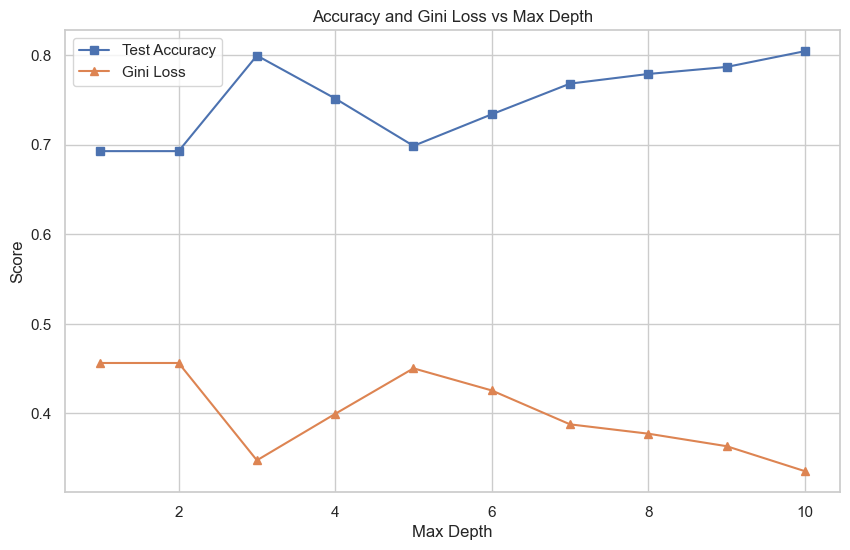

Optimal max_depth based on Test Accuracy: 10


In [36]:
max_depths = range(1, 11)
train_accuracy = []
test_accuracy = []
gini_loss_values = []

for depth in max_depths:
    # Huấn luyện mô hình
    dtc_model = DecisionTreeClassifier(max_depth=depth, random_state=43, class_weight="balanced")
    dtc_model.fit(X_train, y_train)
    save_model(dtc_model, "decision_tree_sklearn_model.joblib")
    # Tính accuracy trên tập train và test

    y_pred = dtc_model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    test_accuracy.append(test_acc)

    # Tính Gini impurity trên tập test
    gini_loss = gini_impurity(y_pred)
    gini_loss_values.append(gini_loss)

    print(f"max_depth={depth}: Test Accuracy={test_acc:.4f}, Gini Loss={gini_loss:.4f}")

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(max_depths, test_accuracy, label='Test Accuracy', marker='s')
plt.plot(max_depths, gini_loss_values, label='Gini Loss', marker='^')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Accuracy and Gini Loss vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

# Tìm max_depth tối ưu dựa trên test accuracy
optimal_depth = max_depths[np.argmax(test_accuracy)]
print(f"Optimal max_depth based on Test Accuracy: {optimal_depth}")

In [37]:
dtc_model = DecisionTreeClassifier(max_depth=8, random_state=43, class_weight="balanced")
dtc_model.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       960
           1       0.18      0.76      0.29        62

    accuracy                           0.78      1022
   macro avg       0.58      0.77      0.58      1022
weighted avg       0.93      0.78      0.83      1022



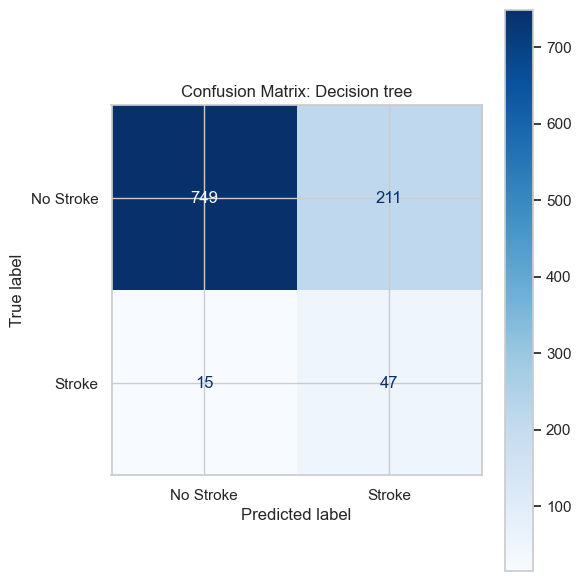

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues", values_format='d')
plt.title("Confusion Matrix: Decision tree")
plt.tight_layout()
plt.show()

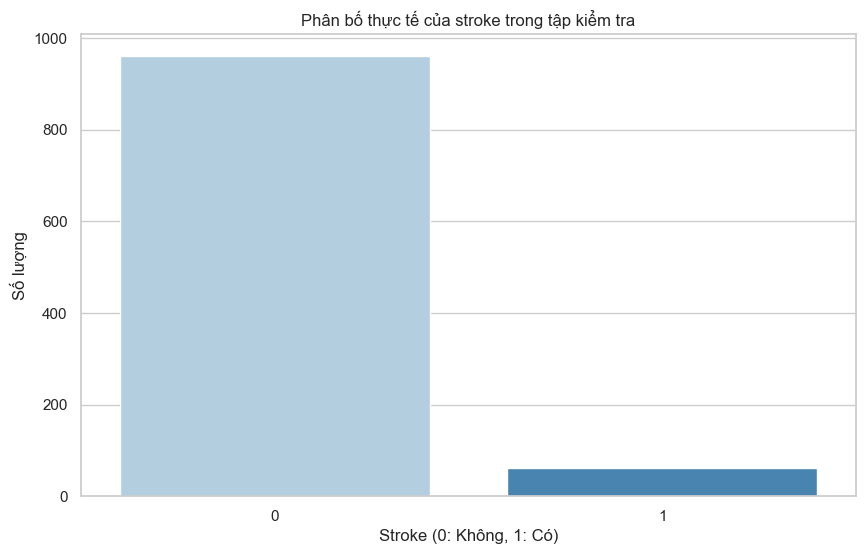

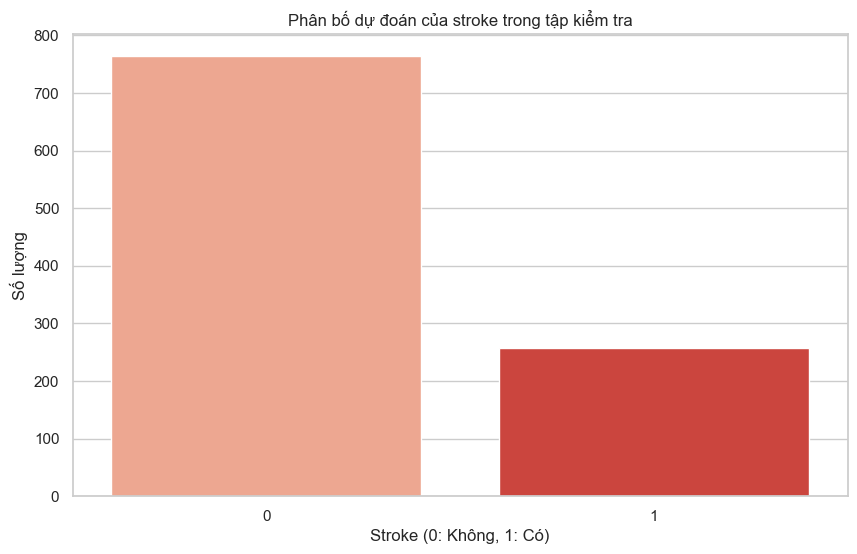

Dự đoán cho mẫu mới (Scikit-learn Tree): Stroke = 1 (0: Không, 1: Có)


In [40]:
# 8. Trực quan hóa dự đoán
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, palette='Blues')
plt.title('Phân bố thực tế của stroke trong tập kiểm tra')
plt.xlabel('Stroke (0: Không, 1: Có)')
plt.ylabel('Số lượng')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred, palette='Reds')
plt.title('Phân bố dự đoán của stroke trong tập kiểm tra')
plt.xlabel('Stroke (0: Không, 1: Có)')
plt.ylabel('Số lượng')
plt.show()

# 9. Dự đoán cho một mẫu mới
new_data_raw = pd.DataFrame({
    'age': [80.0],
    'hypertension': [1],
    'heart_disease': [1],
    'avg_glucose_level': [200],
    'bmi': [35],
    'gender': ['Male'],
    'smoking_status': ['smokes']
})

# Xử lý dữ liệu mới
# Áp dụng preprocessor đã được fit trên dữ liệu huấn luyện
new_data_processed = preprocessor.transform(new_data_raw)

# Chuẩn hóa với MinMaxScaler đã fit trên X_train
new_data_scaled = scaler_normal.transform(new_data_processed)

# Dự đoán sử dụng dtc_model (giả định dtc_model từ vòng lặp trước với optimal_depth)
new_prediction_dtc_model = dtc_model.predict(new_data_scaled)
print(f"Dự đoán cho mẫu mới (Scikit-learn Tree): Stroke = {new_prediction_dtc_model[0]} (0: Không, 1: Có)")

In [41]:
from imblearn.over_sampling import SMOTE
# Fit and transform the data
X = df.drop('stroke', axis=1)
y = df['stroke']
X_processed = preprocessor.fit_transform(X)

# 4. Tách dữ liệu
smote = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Chuẩn hóa dữ liệu với MinMaxScaler
scaler_normal = MinMaxScaler()
X_train = scaler_normal.fit_transform(X_train)
X_test = scaler_normal.transform(X_test)
joblib.dump(scaler, 'decision_tree_from_scratch_scaler.joblib')

['decision_tree_from_scratch_scaler.joblib']

In [87]:
from collections import Counter
# --- Định nghĩa lớp DecisionTree và các hàm phụ trợ ---
class DecisionNode:
    """Class to represent a single node in a decision tree."""
    def __init__(self, left, right, feature_index, threshold, class_label=None):
        self.left = left
        self.right = right
        self.feature_index = feature_index
        self.threshold = threshold
        self.class_label = class_label

    def decide(self, feature):
        if self.class_label is not None:
            return self.class_label
        # Add checks for None left/right nodes before calling decide
        if feature[self.feature_index] < self.threshold:
            if self.left:
                return self.left.decide(feature)
            else:
                 # If left is None, return the majority class of the current node's data
                 # (This is a fallback, ideally the tree building prevents this)
                 return None # Or handle appropriately, maybe raise an error or return default class
        else:
            if self.right:
                return self.right.decide(feature)
            else:
                 # If right is None, return the majority class of the current node's data
                 return None # Or handle appropriately

def gini_impurity(class_vector):
    if len(class_vector) == 0:
        return 0
    counts = Counter(class_vector)
    # Ensure counts are handled for both 0 and 1 classes
    prob_zero = counts.get(0, 0) / len(class_vector)
    prob_one = counts.get(1, 0) / len(class_vector)
    prob_sum = prob_zero ** 2 + prob_one ** 2
    return 1 - prob_sum

def partition_classes(features, classes, feature_index, threshold):
    # Ensure features and classes are numpy arrays if they are not already
    features_np = np.array(features)
    classes_np = np.array(classes)

    left_indices = features_np[:, feature_index] < threshold
    right_indices = ~left_indices

    # Ensure you handle the case where one partition might be empty
    X_left = features_np[left_indices]
    X_right = features_np[right_indices]
    y_left = classes_np[left_indices]
    y_right = classes_np[right_indices]

    return X_left, X_right, y_left, y_right

def gini_gain(previous_classes, current_classes_list):
    if len(previous_classes) == 0:
        return 0
    previous_gini = gini_impurity(previous_classes)
    current_gini = 0
    total_samples = len(previous_classes)
    for cls in current_classes_list:
        if len(cls) > 0:
            current_gini += (len(cls) / total_samples) * gini_impurity(cls)
    return previous_gini - current_gini

def get_most_occurring_feature(classes):
    if len(classes) == 0:
        return 0 # Or None, depending on how you handle empty nodes
    classes_np = classes if isinstance(classes, np.ndarray) else np.array(classes)
    # Handle the case where Counter might be empty if classes are empty (should be caught by len(classes)==0 check)
    counts = Counter(classes_np)
    if not counts:
        return 0 # Default or handle as needed
    return counts.most_common(1)[0][0]

class DecisionTree:
    def __init__(self, depth_limit=float('inf')):
        self.root = None
        self.depth_limit = depth_limit

    def fit(self, features, classes):
        # Ensure features and classes are numpy arrays at the start of fit
        features_np = np.array(features)
        classes_np = np.array(classes)
        self.root = self.__build_tree__(features_np, classes_np)

    def __build_tree__(self, features, classes, depth=0):
        # Base cases for recursion
        if len(classes) == 0: # No data left
            return DecisionNode(None, None, None, None, None) # Or a default class like 0
        if depth >= self.depth_limit: # Reached depth limit
            return DecisionNode(None, None, None, None, get_most_occurring_feature(classes))
        if np.all(classes == classes[0]): # All classes are the same
            return DecisionNode(None, None, None, None, classes[0])

        best_gain = -1
        best_feature = -1
        best_threshold = -1

        # Iterate through features and find the best split
        for feature_idx in range(features.shape[1]):
            thresholds = np.unique(features[:, feature_idx])
            for threshold in thresholds:
                # Call partition_classes with all required arguments
                _, _, y_left, y_right = partition_classes(features, classes, feature_idx, threshold)
                gain = gini_gain(classes, [y_left, y_right])

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold

        # If no split improves the gain, make a leaf node
        if best_gain == 0:
            return DecisionNode(None, None, None, None, get_most_occurring_feature(classes))

        # Recursively build left and right subtrees
        X_left, X_right, y_left, y_right = partition_classes(features, classes, best_feature, best_threshold)
        # Pass the next depth level to the recursive calls
        left_tree = self.__build_tree__(X_left, y_left, depth + 1)
        right_tree = self.__build_tree__(X_right, y_right, depth + 1)

        # Return the current node
        return DecisionNode(left_tree, right_tree, best_feature, best_threshold)


    def predict(self, features):
        features_np = features if isinstance(features, np.ndarray) else np.array(features)
        # Handle potential None results from decide method in leaf nodes
        results = [self.root.decide(feature) for feature in features_np]
        # Convert None results if necessary (e.g., to a default class)
        # For now, let's assume decide always returns a class label or None
        # You might want to filter out Nones or handle them based on your logic
        return [r for r in results if r is not None]


depth_limit=1: Accuracy=0.6928, Gini Loss=0.4563
depth_limit=2: Accuracy=0.6928, Gini Loss=0.4563
depth_limit=3: Accuracy=0.7994, Gini Loss=0.3477
depth_limit=4: Accuracy=0.7515, Gini Loss=0.3996
depth_limit=5: Accuracy=0.6977, Gini Loss=0.4510
depth_limit=6: Accuracy=0.7339, Gini Loss=0.4257
depth_limit=7: Accuracy=0.7671, Gini Loss=0.3888
depth_limit=8: Accuracy=0.7779, Gini Loss=0.3765
depth_limit=9: Accuracy=0.7877, Gini Loss=0.3645
depth_limit=10: Accuracy=0.7994, Gini Loss=0.3412


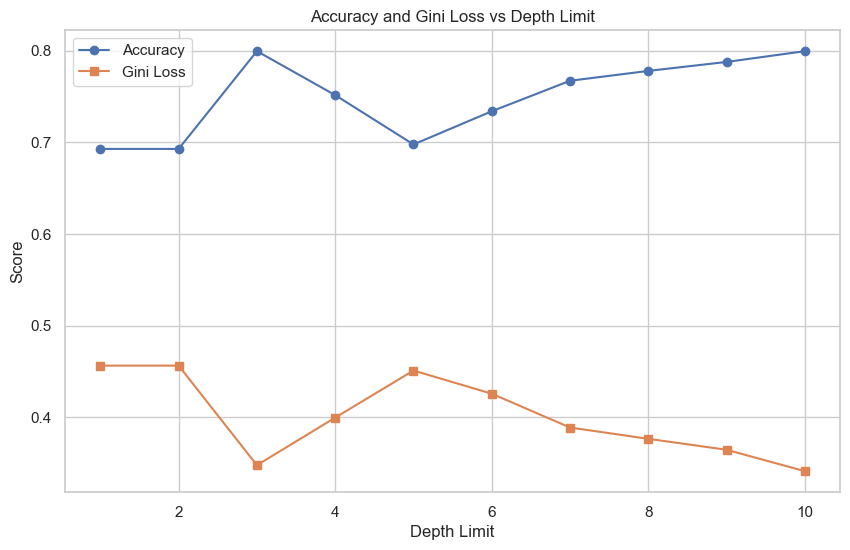

In [43]:

# --- Thử các depth_limit từ 1 đến 10 ---
depth_limits = range(1, 11)
accuracies = []
gini_losses = []

for depth in depth_limits:
    # Khởi tạo và huấn luyện mô hình
    dt = DecisionTree(depth_limit=depth)
    dt.fit(X_train, y_train)
    save_model(dt, "decision_tree_from_scratch_model.joblib")
    # Dự đoán trên tập test
    y_pred = dt.classify(X_test)

    # Tính accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Tính Gini loss trên y_pred
    gini_loss = gini_impurity(y_pred)
    gini_losses.append(gini_loss)

    print(f"depth_limit={depth}: Accuracy={accuracy:.4f}, Gini Loss={gini_loss:.4f}")

# --- Trực quan hóa kết quả ---
plt.figure(figsize=(10, 6))
plt.plot(depth_limits, accuracies, label='Accuracy', marker='o')
plt.plot(depth_limits, gini_losses, label='Gini Loss', marker='s')
plt.xlabel('Depth Limit')
plt.ylabel('Score')
plt.title('Accuracy and Gini Loss vs Depth Limit')
plt.legend()
plt.grid(True)
plt.savefig('depth_limit_metrics.png')
plt.show()

In [44]:
dt = DecisionTree(depth_limit=8)
dt.fit(X_train, y_train)

    # Dự đoán trên tập test
y_pred = dt.classify(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       960
           1       0.18      0.74      0.29        62

    accuracy                           0.78      1022
   macro avg       0.58      0.76      0.58      1022
weighted avg       0.93      0.78      0.83      1022



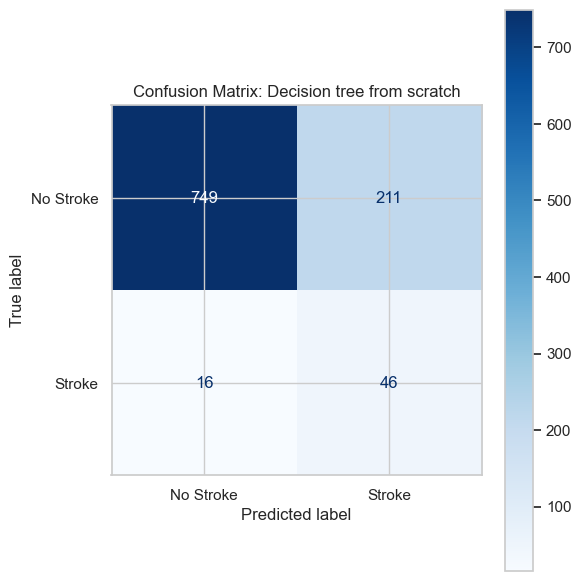

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues", values_format='d')
plt.title("Confusion Matrix: Decision tree from scratch")
plt.tight_layout()
plt.show()

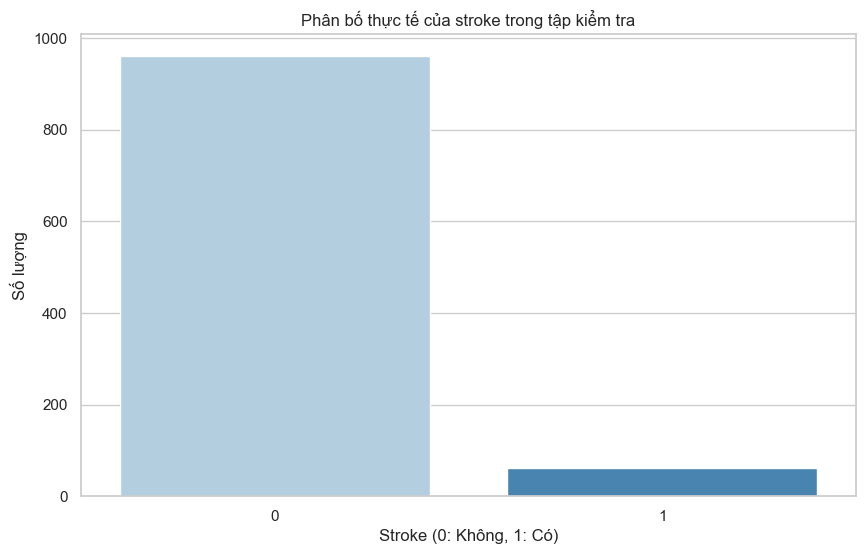

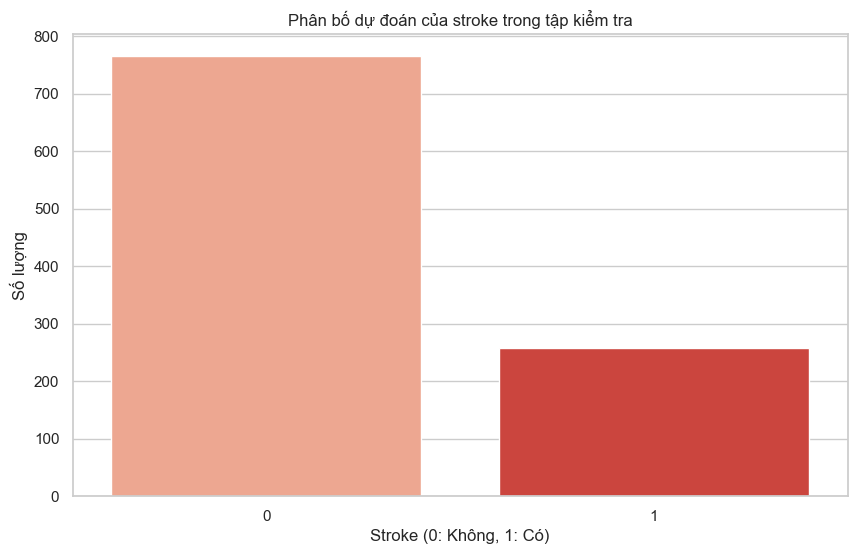

Dự đoán cho mẫu mới (Scikit-learn Tree): Stroke = 1 (0: Không, 1: Có)


In [47]:
# 8. Trực quan hóa dự đoán
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, palette='Blues')
plt.title('Phân bố thực tế của stroke trong tập kiểm tra')
plt.xlabel('Stroke (0: Không, 1: Có)')
plt.ylabel('Số lượng')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred, palette='Reds')
plt.title('Phân bố dự đoán của stroke trong tập kiểm tra')
plt.xlabel('Stroke (0: Không, 1: Có)')
plt.ylabel('Số lượng')
plt.show()

# 9. Dự đoán cho một mẫu mới
new_data_raw = pd.DataFrame({
    'age': [80.0],
    'hypertension': [1],
    'heart_disease': [1],
    'avg_glucose_level': [200],
    'bmi': [35],
    'gender': ['Male'],
    'smoking_status': ['smokes']
})

# Xử lý dữ liệu mới
# Áp dụng preprocessor đã được fit trên dữ liệu huấn luyện
new_data_processed = preprocessor.transform(new_data_raw)

# Chuẩn hóa với MinMaxScaler đã fit trên X_train
new_data_scaled = scaler_normal.transform(new_data_processed)

# Dự đoán sử dụng dtc_model (giả định dtc_model từ vòng lặp trước với optimal_depth)
new_prediction_dtc_model = dt.classify(new_data_scaled)
print(f"Dự đoán cho mẫu mới (Scikit-learn Tree): Stroke = {new_prediction_dtc_model[0]} (0: Không, 1: Có)")

In [48]:
from imblearn.over_sampling import SMOTE
# Fit and transform the data
X = df.drop('stroke', axis=1)
y = df['stroke']
X_processed = preprocessor.fit_transform(X)

# 4. Tách dữ liệu
smote = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Chuẩn hóa dữ liệu với MinMaxScaler
scaler_normal = MinMaxScaler()
X_train = scaler_normal.fit_transform(X_train)
X_test = scaler_normal.transform(X_test)
joblib.dump(scaler, 'ann_tensorflow_scaler.joblib')

['ann_tensorflow_scaler.joblib']

Epoch 1/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5689 - loss: 0.6816
Epoch 2/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7344 - loss: 0.5626
Epoch 3/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7606 - loss: 0.5132
Epoch 4/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7689 - loss: 0.4949
Epoch 5/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7799 - loss: 0.4773
Epoch 6/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7916 - loss: 0.4736
Epoch 7/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7818 - loss: 0.4737
Epoch 8/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7883 - loss: 0.4693
Epoch 9/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7983 - loss: 0.4538
Epoch 10/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7887 - loss: 0.4673
Epoch 11/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4633
Epoch 12/100
244/244 ━━━━━━━━━━━━━━━━━━━━

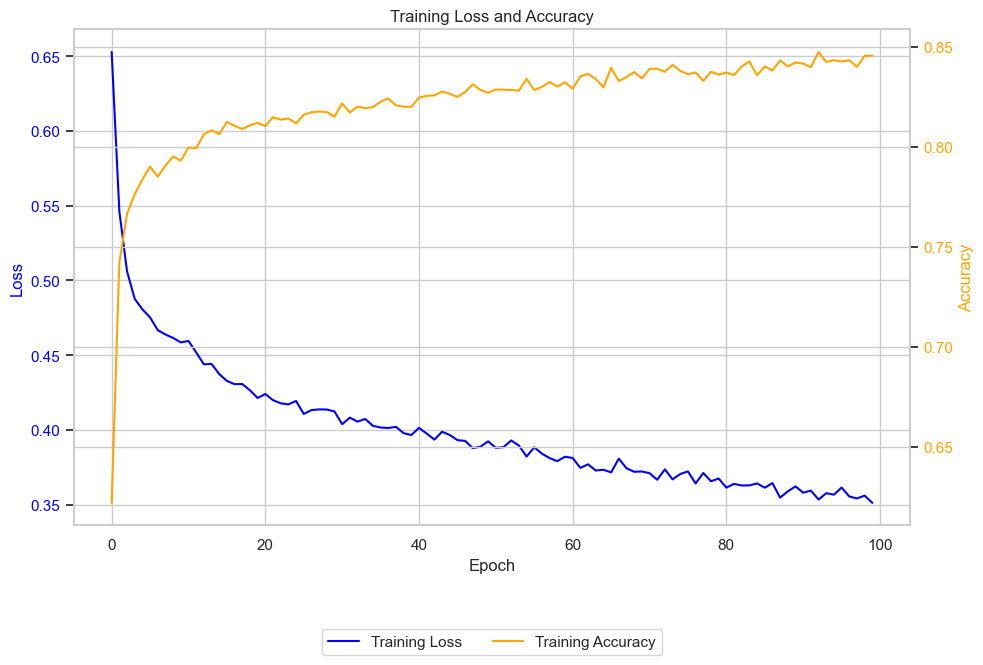


Accuracy của ANN trên tập kiểm tra: 0.82

Báo cáo phân loại của ANN:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       960
           1       0.20      0.65      0.31        62

    accuracy                           0.82      1022
   macro avg       0.59      0.74      0.60      1022
weighted avg       0.93      0.82      0.86      1022



In [49]:
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



# 8. Xây dựng và huấn luyện ANN
ann = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Lớp ẩn 1: 32 nơ-ron
    Dropout(0.3),  # Dropout để tránh overfitting
    Dense(16, activation='relu'),  # Lớp ẩn 2: 16 nơ-ron
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Lớp đầu ra: 1 nơ-ron với sigmoid cho phân loại nhị phân
])

# Compile mô hình
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = ann.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
save_model(ann, "ann_tensorflow_model.joblib")
# Visualize training loss and accuracy
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot training loss on primary y-axis
ax1.plot(history.history['loss'], label='Training Loss', color='blue')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create secondary y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'], label='Training Accuracy', color='orange')
ax2.set_ylabel('Accuracy', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title('Training Loss and Accuracy')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.tight_layout()
plt.show()

# 9. Đánh giá ANN trên tập test
y_pred_ann_proba = ann.predict(X_test, verbose=0)
y_pred_ann = (y_pred_ann_proba > 0.5).astype(int).flatten()  # Ngưỡng 0.5 để phân loại
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"\nAccuracy của ANN trên tập kiểm tra: {round(accuracy_ann, 2)}")
print("\nBáo cáo phân loại của ANN:")
print(classification_report(y_test, y_pred_ann))

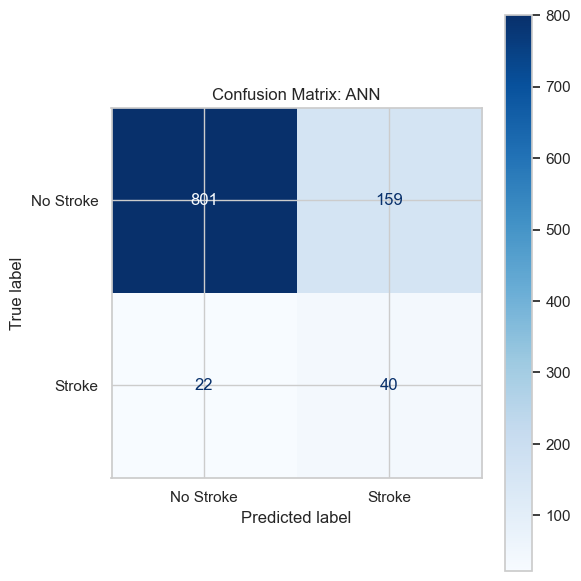

In [50]:
cm = confusion_matrix(y_test, y_pred_ann)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues", values_format='d')
plt.title("Confusion Matrix: ANN")
plt.tight_layout()
plt.show()

In [51]:
# 10. Dự đoán mẫu mới
new_data_raw = pd.DataFrame({
    'age': [62.0],
    'hypertension': [0],
    'heart_disease': [1],
    'avg_glucose_level': [223.5],
    'bmi': [32.1],
    'gender': ['Male'],
    'smoking_status': ['smokes']}
)





# Áp dụng preprocessor đã fit trên dữ liệu huấn luyện
new_data_processed = preprocessor.transform(new_data_raw)

# Chuẩn hóa với MinMaxScaler đã fit trên X_train
new_data_scaled = scaler_normal.transform(new_data_processed)


# Dự đoán
new_prediction_ann_proba = ann.predict(new_data_scaled, verbose=0)
new_prediction_ann = (new_prediction_ann_proba > 0.5).astype(int).flatten()
print(f"Dự đoán với ANN: Stroke = {new_prediction_ann[0]} (0: Không, 1: Có)")
print(f"Xác suất stroke=1 với ANN: {round(new_prediction_ann_proba[0][0], 2)}")

Dự đoán với ANN: Stroke = 1 (0: Không, 1: Có)
Xác suất stroke=1 với ANN: 0.9300000071525574


In [52]:
from imblearn.over_sampling import SMOTE
# Fit and transform the data
X = df.drop('stroke', axis=1)
y = df['stroke']
X_processed = preprocessor.fit_transform(X)

# 4. Tách dữ liệu
smote = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Chuẩn hóa dữ liệu với MinMaxScaler
scaler_normal = MinMaxScaler()
X_train = scaler_normal.fit_transform(X_train)
X_test = scaler_normal.transform(X_test)
joblib.dump(scaler, 'ann_from_scratch_scaler.joblib')

['ann_from_scratch_scaler.joblib']

Epoch 1/100, Loss: 0.6972, Accuracy: 0.5629
Epoch 2/100, Loss: 0.6981, Accuracy: 0.5712
Epoch 3/100, Loss: 0.6994, Accuracy: 0.6095
Epoch 4/100, Loss: 0.7003, Accuracy: 0.6462
Epoch 5/100, Loss: 0.7013, Accuracy: 0.6631
Epoch 6/100, Loss: 0.7018, Accuracy: 0.6723
Epoch 7/100, Loss: 0.7025, Accuracy: 0.6810
Epoch 8/100, Loss: 0.7031, Accuracy: 0.6876
Epoch 9/100, Loss: 0.7041, Accuracy: 0.6968
Epoch 10/100, Loss: 0.7046, Accuracy: 0.6991
Epoch 11/100, Loss: 0.7059, Accuracy: 0.7023
Epoch 12/100, Loss: 0.7064, Accuracy: 0.7022
Epoch 13/100, Loss: 0.7076, Accuracy: 0.7036
Epoch 14/100, Loss: 0.7087, Accuracy: 0.7038
Epoch 15/100, Loss: 0.7097, Accuracy: 0.7060
Epoch 16/100, Loss: 0.7112, Accuracy: 0.7063
Epoch 17/100, Loss: 0.7126, Accuracy: 0.7086
Epoch 18/100, Loss: 0.7140, Accuracy: 0.7099
Epoch 19/100, Loss: 0.7155, Accuracy: 0.7122
Epoch 20/100, Loss: 0.7173, Accuracy: 0.7224
Epoch 21/100, Loss: 0.7188, Accuracy: 0.7258
Epoch 22/100, Loss: 0.7203, Accuracy: 0.7271
Epoch 23/100, Loss:

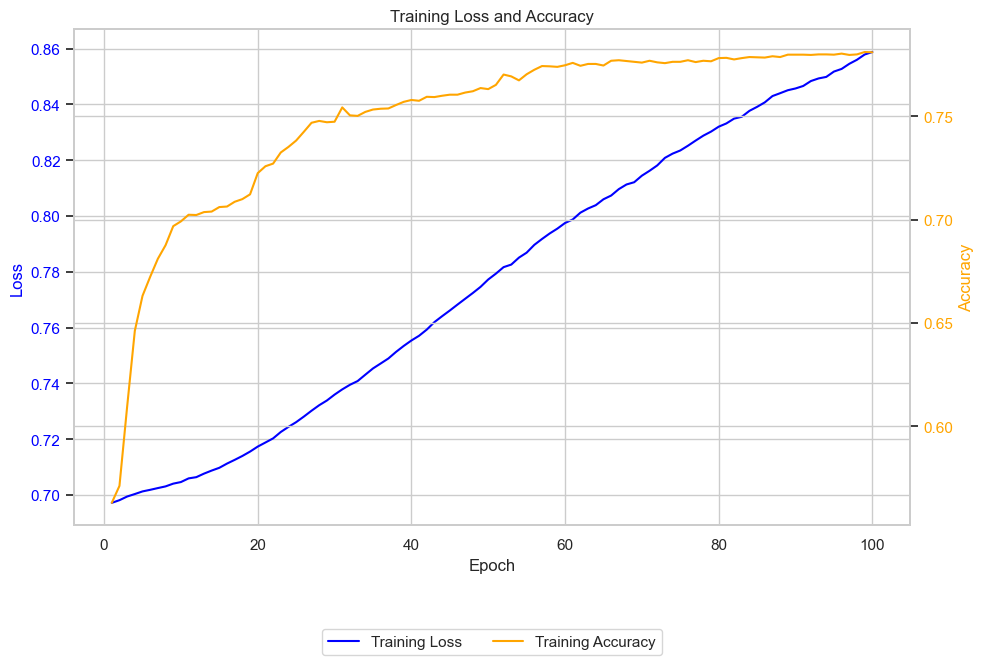

In [53]:
class ANN:
    def __init__(self, input_size, hidden1_size=32, hidden2_size=16, output_size=1, dropout_rate=0.2, learning_rate=0.01):
        # Initialize weights with He initialization for ReLU
        self.W1 = np.random.randn(input_size, hidden1_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden1_size))
        self.W2 = np.random.randn(hidden1_size, hidden2_size) * np.sqrt(2.0 / hidden1_size)
        self.b2 = np.zeros((1, hidden2_size))
        self.W3 = np.random.randn(hidden2_size, output_size) * np.sqrt(2.0 / hidden2_size)
        self.b3 = np.zeros((1, output_size))
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.loss_history = []  # Store loss per epoch
        self.accuracy_history = []  # Store accuracy per epoch

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid(self, x):
        x = np.array(x, dtype=np.float64)
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def dropout(self, x, training=True):
        if training:
            mask = np.random.binomial(1, 1 - self.dropout_rate, size=x.shape) / (1 - self.dropout_rate)
            return x * mask
        return x

    def forward(self, X, training=True):
        X = np.array(X, dtype=np.float64)
        # Hidden layer 1
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.a1_drop = self.dropout(self.a1, training)

        # Hidden layer 2
        self.z2 = np.dot(self.a1_drop, self.W2) + self.b2
        self.a2 = self.relu(self.z2)
        self.a2_drop = self.dropout(self.a2, training)

        # Output layer
        self.z3 = np.dot(self.a2_drop, self.W3) + self.b3
        self.a3 = self.sigmoid(self.z3)

        return self.a3

    def backward(self, X, y, output):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)
        m = X.shape[0]

        # Reshape y to be a column vector (batch_size, 1)
        y = y.reshape(-1, 1) # Add this line

        # Gradient for output layer
        self.error = output - y
        self.delta3 = self.error * self.sigmoid_derivative(output)

        # Gradient for hidden layer 2
        self.delta2 = np.dot(self.delta3, self.W3.T) * self.relu_derivative(self.a2)
        self.delta2 *= (self.a2_drop > 0) # Apply dropout mask derivative

        # Gradient for hidden layer 1
        self.delta1 = np.dot(self.delta2, self.W2.T) * self.relu_derivative(self.a1)
        self.delta1 *= (self.a1_drop > 0) # Apply dropout mask derivative

        # Update weights and biases
        self.W3 -= self.learning_rate * np.dot(self.a2_drop.T, self.delta3) / m
        self.b3 -= self.learning_rate * np.sum(self.delta3, axis=0, keepdims=True) / m
        self.W2 -= self.learning_rate * np.dot(self.a1_drop.T, self.delta2) / m
        self.b2 -= self.learning_rate * np.sum(self.delta2, axis=0, keepdims=True) / m
        self.W1 -= self.learning_rate * np.dot(X.T, self.delta1) / m
        self.b1 -= self.learning_rate * np.sum(self.delta1, axis=0, keepdims=True) / m

    def train(self, X, y, epochs=100, batch_size=32):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)
        m = X.shape[0]
        for epoch in range(epochs):
            # Shuffle data
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Train in batches
            for i in range(0, m, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                # Forward
                output = self.forward(X_batch, training=True)

                # Backward
                self.backward(X_batch, y_batch, output)

            # Calculate loss and accuracy on full training set (no dropout for evaluation)
            output = self.forward(X, training=False)
            # Add a small epsilon to prevent log(0)
            loss = -np.mean(y * np.log(output + 1e-10) + (1 - y) * np.log(1 - output + 1e-10))
            predictions = (output >= 0.5).astype(int).flatten() # Flatten predictions
            accuracy = np.mean(predictions == y)

            # Store metrics
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)


            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


    def predict_proba(self, X):
        X = np.array(X, dtype=np.float64)
        return self.forward(X, training=False)

    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        output = self.forward(X, training=False)
        return (output >= 0.5).astype(int).flatten() # Flatten output


# Assume X_train, y_train, X_test, y_test are already defined and preprocessed as in the notebook

# Khởi tạo và huấn luyện ANN
input_size = X_train.shape[1]
ann_model = ANN(input_size=input_size, hidden1_size=32, hidden2_size=16, output_size=1, learning_rate=0.01, dropout_rate=0.2)
ann_model.train(X_train, y_train, epochs=100, batch_size=32)
save_model(ann_model, "ann_from_scratch_model.joblib")
# Đánh giá trên tập test
y_pred_ann = ann_model.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"\nAccuracy của Custom ANN trên tập kiểm tra: {round(accuracy_ann, 2)}")
print("\nBáo cáo phân loại của Custom ANN:")
print(classification_report(y_test, y_pred_ann))


# Visualize training loss and accuracy
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot training loss on primary y-axis
ax1.plot(range(1, len(ann_model.loss_history) + 1), ann_model.loss_history, label='Training Loss', color='blue')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create secondary y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(range(1, len(ann_model.accuracy_history) + 1), ann_model.accuracy_history, label='Training Accuracy', color='orange')
ax2.set_ylabel('Accuracy', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title('Training Loss and Accuracy')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.tight_layout()
plt.show()

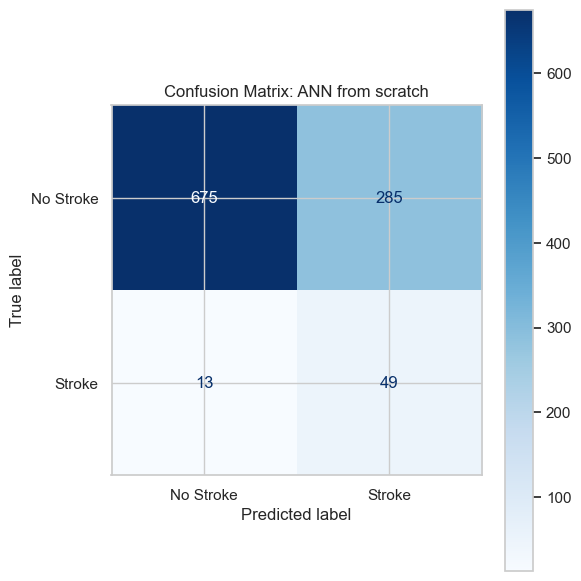

In [54]:
cm = confusion_matrix(y_test, y_pred_ann)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues", values_format='d')
plt.title("Confusion Matrix: ANN from scratch")
plt.tight_layout()
plt.show()

In [55]:
# Dự đoán mẫu mới
new_data_raw = pd.DataFrame({
    'age': [62.0],
    'hypertension': [0],
    'heart_disease': [1],
    'avg_glucose_level': [69.5],
    'bmi': [18.1],
    'gender': ['Male'],
    'smoking_status': ['smokes']
})



# Áp dụng preprocessor đã fit trên dữ liệu huấn luyện
new_data_processed = preprocessor.transform(new_data_raw)

# Chuẩn hóa với MinMaxScaler đã fit trên X_train
new_data_scaled = scaler_normal.transform(new_data_processed)


# Dự đoán
new_prediction_ann_proba = ann_model.predict_proba(new_data_scaled)
new_prediction_ann = ann_model.predict(new_data_scaled)
print(f"Dự đoán với ANN: Stroke = {new_prediction_ann[0]} (0: Không, 1: Có)")
print(f"Xác suất stroke=1 với ANN: {round(new_prediction_ann_proba[0][0], 2)}")

Dự đoán với ANN: Stroke = 1 (0: Không, 1: Có)
Xác suất stroke=1 với ANN: 0.82


# Support Vector Machine


## Sử dụng thư viện


In [56]:
from imblearn.over_sampling import SMOTE
# Fit and transform the data
X = df.drop('stroke', axis=1)
y = df['stroke']
X_processed = preprocessor.fit_transform(X)

# 4. Tách dữ liệu
smote = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Chuẩn hóa dữ liệu với MinMaxScaler
scaler_normal = MinMaxScaler()
X_train = scaler_normal.fit_transform(X_train)
X_test = scaler_normal.transform(X_test)
joblib.dump(scaler, 'svm_sklearn_scaler.joblib')

['svm_sklearn_scaler.joblib']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
model.fit(X_train, y_train)
save_model(model, "svm_sklearn_model.joblib")

In [58]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       960
           1       0.17      0.63      0.26        62

    accuracy                           0.78      1022
   macro avg       0.57      0.71      0.57      1022
weighted avg       0.92      0.78      0.84      1022



## SVM from scratch

In [59]:
from imblearn.over_sampling import SMOTE
# Fit and transform the data
X = df.drop('stroke', axis=1)
y = df['stroke']
X_processed = preprocessor.fit_transform(X)

# 4. Tách dữ liệu
smote = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Chuẩn hóa dữ liệu với MinMaxScaler
scaler_normal = MinMaxScaler()
X_train = scaler_normal.fit_transform(X_train)
X_test = scaler_normal.transform(X_test)
joblib.dump(scaler, 'svm_from_scratch_scaler.joblib')

['svm_from_scratch_scaler.joblib']

In [60]:
import numpy as np

# Kernel functions
def linear_kernel(x, y):
    return np.dot(x, y)

def polynomial_kernel(x, y, degree=3):
    return (1 + np.dot(x, y)) ** degree

def rbf_kernel(x, y, gamma=0.1):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)

class KernelSVM:
    def __init__(self, kernel=linear_kernel, C=1.0, max_iters=1000, lr=0.001, **kernel_params):
        self.kernel = kernel
        self.C = C
        self.max_iters = max_iters
        self.lr = lr
        self.kernel_params = kernel_params
        self.sv_alpha = None 
        self.sv_X = None
        self.sv_y = None
        self.alpha = None

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.X = X
        self.y = y
        self.alpha = np.zeros(n_samples)

        # Precompute Kernel Matrix
        self.K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                self.K[i, j] = self.kernel(X[i], X[j], **self.kernel_params)

        # Training via SGD on dual hinge loss
        for _ in range(self.max_iters):
            for i in range(n_samples):
                margin = y[i] * np.sum(self.alpha * y * self.K[:, i])
                if margin < 1:
                    self.alpha[i] += self.lr * (1 - margin)
                else:
                    self.alpha[i] -= self.lr * self.C * self.alpha[i]  # regularization

        # Support vectors
        self.support_indices = self.alpha > 1e-5
        self.sv_alpha = self.alpha[self.support_indices]
        self.sv_X = X[self.support_indices]
        self.sv_y = y[self.support_indices]

    def project(self, X):
        result = []
        for x in X:
            s = 0
            for alpha_i, y_i, x_i in zip(self.sv_alpha, self.sv_y, self.sv_X):
                s += alpha_i * y_i * self.kernel(x, x_i, **self.kernel_params)
            result.append(s)
        return np.array(result)

    def predict(self, X):
        return np.sign(self.project(X))

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load(filename):
        with open(filename, 'rb') as f:
            return pickle.load(f)

In [61]:
y_train = np.where(y_train <= 0, -1, 1)  # Chuyển đổi nhãn 0 thành -1
# Huấn luyện SVM với RBF kernel
model = KernelSVM(kernel=rbf_kernel, C=1.0, max_iters=1000, lr=0.01)
model.fit(np.array(X_train), y_train)
save_model(model, 'svm_from_scratch_model.joblib')

In [62]:
from sklearn.metrics import classification_report, accuracy_score
model = joblib.load("svm_from_scratch_model.joblib")
y_pred = model.predict(X_test)
y_pred = np.where(y_pred == -1, 0, 1)  # Chuyển đổi nhãn -1 về 0
print(y_pred)
y_test = np.where(y_test == -1, 0, 1)  # Chuyển đổi nhãn -1 về 0
print(np.array(y_test))
print(f"Accuracy của SVM: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
Accuracy của SVM: 0.9354
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97      1022

    accuracy                           0.94      1022
   macro avg       0.50      0.47      0.48      1022
weighted avg       1.00      0.94      0.97      1022



[1. 1. 1. ... 1. 1. 1.]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97      1022

    accuracy                           0.94      1022
   macro avg       0.50      0.47      0.48      1022
weighted avg       1.00      0.94      0.97      1022



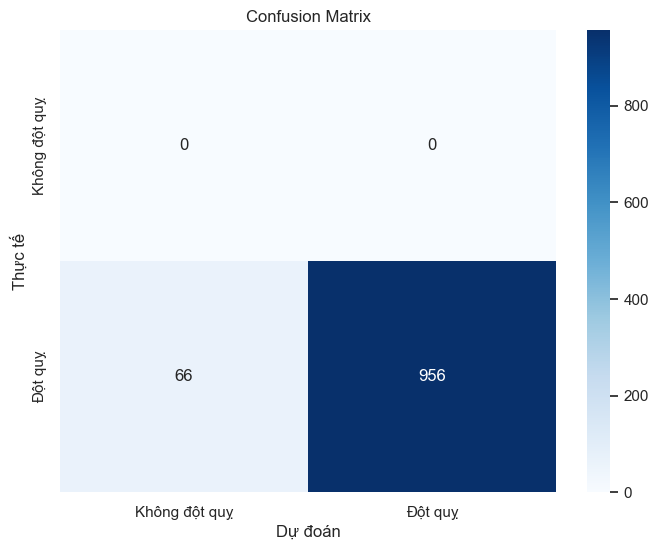

In [63]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib
model = joblib.load('svm_from_scratch_model.joblib')
y_pred = model.predict(X_test)
print(y_pred)
y_pred = np.where(y_pred == -1, 0, 1)  # Chuyển đổi nhãn -1 về 0
y_test = np.where(y_test == -1, 0, 1)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Không đột quỵ', 'Đột quỵ'],
            yticklabels=['Không đột quỵ', 'Đột quỵ'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix')
plt.show()

In [64]:
# Dự đoán trên dữ liệu mới
new_data_raw = pd.DataFrame({
    'age': [62.0],
    'hypertension': [0],
    'heart_disease': [1],
    'avg_glucose_level': [69.5],
    'bmi': [18.1],
    'gender': ['Male'],
    'smoking_status': ['smokes']
})

# Define the preprocess_and_predict function
def preprocess_and_predict(data_raw, preprocessor, scaler, model):
    """
    Preprocesses new raw data and makes a prediction using a trained model.

    Args:
        data_raw (pd.DataFrame): The new raw data.
        preprocessor (ColumnTransformer): The fitted ColumnTransformer for preprocessing.
        scaler (MinMaxScaler): The fitted MinMaxScaler for scaling.
        model (object): The trained model with a .predict() method.

    Returns:
        numpy.ndarray: The prediction from the model.
    """
    # Apply preprocessor (one-hot encoding, imputation, initial scaling if any)
    data_processed = preprocessor.transform(data_raw)

    # Apply the scaler (MinMaxScaler) fitted on the training data
    data_scaled = scaler.transform(data_processed)

    # Ensure data is in the correct format for the custom SVM (numpy array)
    data_scaled_np = np.array(data_scaled, dtype=np.float64)

    # Predict using the custom SVM model
    prediction = model.predict(data_scaled_np)

    return prediction

# Ensure the custom SVM model 'svm' is trained before this cell is run.
# The previous cell containing the SVM class definition and training needs to be run first.


# K-Nearest Neighbor


## Sử dụng thư viện

In [65]:
from imblearn.over_sampling import SMOTE
# Fit and transform the data
X = df.drop('stroke', axis=1)
y = df['stroke']
X_processed = preprocessor.fit_transform(X)

# 4. Tách dữ liệu
smote = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Chuẩn hóa dữ liệu với MinMaxScaler
scaler_normal = MinMaxScaler()
X_train = scaler_normal.fit_transform(X_train)
X_test = scaler_normal.transform(X_test)
joblib.dump(scaler, 'knn_sklearn_scaler.joblib')

['knn_sklearn_scaler.joblib']

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
save_model(knn, "knn_sklearn_model.joblib")

In [67]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       960
           1       0.13      0.35      0.19        62

    accuracy                           0.82      1022
   macro avg       0.54      0.60      0.55      1022
weighted avg       0.90      0.82      0.86      1022



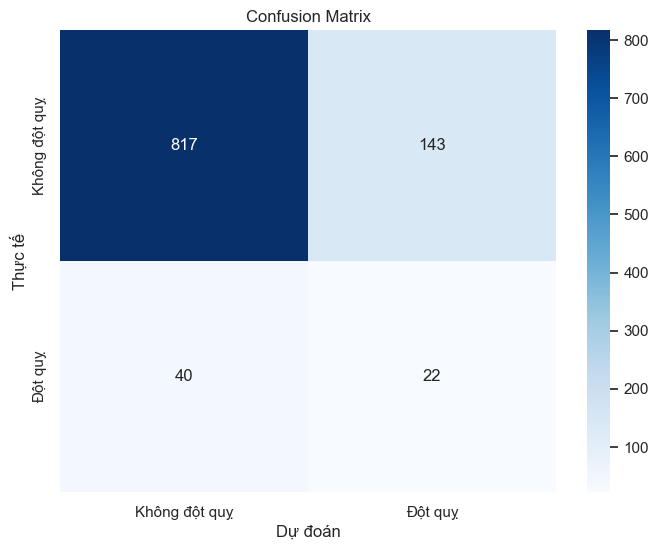

In [68]:
from matplotlib import pyplot as plt


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Không đột quỵ', 'Đột quỵ'],
            yticklabels=['Không đột quỵ', 'Đột quỵ'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix')
plt.show()

In [69]:
# Dự đoán cho mẫu mới
new_data_raw = pd.DataFrame({
    'age': [62.0],
    'hypertension': [0],
    'heart_disease': [1],
    'avg_glucose_level': [69.5],
    'bmi': [18.1],
    'gender': ['Male'],
    'smoking_status': ['smokes']
})





# Áp dụng preprocessor đã fit trên dữ liệu huấn luyện
new_data_processed = preprocessor.transform(new_data_raw)

# Chuẩn hóa với MinMaxScaler đã fit trên X_train
new_data_scaled = scaler_normal.transform(new_data_processed)

# Dự đoán cho mẫu mới
new_prediction = knn.predict(new_data_scaled)
print(f"Dự đoán cho mẫu mới: Stroke = {new_prediction[0]} (0: Không, 1: Có)")

Dự đoán cho mẫu mới: Stroke = 1 (0: Không, 1: Có)


## KNN from scratch

In [70]:
from imblearn.over_sampling import SMOTE
# Fit and transform the data
X = df.drop('stroke', axis=1)
y = df['stroke']
X_processed = preprocessor.fit_transform(X)

# 4. Tách dữ liệu
smote = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Chuẩn hóa dữ liệu với MinMaxScaler
scaler_normal = MinMaxScaler()
X_train = scaler_normal.fit_transform(X_train)
X_test = scaler_normal.transform(X_test)
joblib.dump(scaler, 'knn_from_scratch_scaler.joblib')

['knn_from_scratch_scaler.joblib']

In [71]:
# Định nghĩa các hàm khoảng cách
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# Lớp KNNScratch đã được sửa
class KNNScratch:
    def __init__(self, k=3, weights='distance', metric='euclidean'):
        self.k = k
        self.weights = weights  # 'uniform' hoặc 'distance'
        self.metric = metric  # 'euclidean' hoặc 'manhattan'

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Chọn hàm khoảng cách dựa trên metric
        if self.metric == 'euclidean':
            distance_func = euclidean_distance
        elif self.metric == 'manhattan':
            distance_func = manhattan_distance
        else:
            raise ValueError("Metric must be 'euclidean' or 'manhattan'")

        # Tính khoảng cách giữa x và tất cả các điểm trong tập huấn luyện
        distances = [distance_func(x, x_train) for x_train in self.X_train]
        # Lấy k chỉ số của các điểm gần nhất
        k_indices = np.argsort(distances)[:self.k]

        # Lấy nhãn và khoảng cách của các điểm gần nhất
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        k_nearest_distances = [distances[i] for i in k_indices]

        # Áp dụng trọng số
        if self.weights == 'distance':
            # Tránh chia cho 0 bằng cách thêm một giá trị nhỏ (1e-5)
            weights = [1 / (d + 1e-5) if d > 0 else 1.0 for d in k_nearest_distances]
        else:  # 'uniform'
            weights = [1.0] * self.k

        # Tính nhãn phổ biến nhất với trọng số
        weighted_votes = Counter({label: w for label, w in zip(k_nearest_labels, weights)})
        most_common = weighted_votes.most_common(1)
        return most_common[0][0]

In [72]:
from collections import Counter
# Thử nghiệm với weights='distance' và metric='euclidean'
n_neighbors_range = range(1, 16)  # Thử từ 1 đến 20 neighbors
train_accuracies = []
test_accuracies = []

for k in n_neighbors_range:
    # Khởi tạo và huấn luyện KNN từ scratch
    knn = KNNScratch(k=k, weights='distance', metric='euclidean')
    knn.fit(X_train, y_train)


    # Đánh giá trên tập test
    y_test_pred = knn.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)


In [73]:
knn = KNNScratch(k=4, weights='distance', metric='euclidean')
knn.fit(X_train, y_train)
save_model(knn, "knn_from_scratch_model.joblib")
y_pred = knn.predict(X_test)
print("Báo cáo phân loại của KNN Scratch (n_neighbors=6, weights='distance', metric='euclidean'):")
print(classification_report(y_test, y_pred))

# In accuracy trên tập test
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy của KNN Scratch trên tập kiểm tra: {round(accuracy_test, 2)}")

# Tìm k tối ưu dựa trên test accuracy
best_k = n_neighbors_range[np.argmax(test_accuracies)]
print(f"Giá trị k tối ưu dựa trên test accuracy: {best_k}")

Báo cáo phân loại của KNN Scratch (n_neighbors=6, weights='distance', metric='euclidean'):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       960
           1       0.17      0.29      0.22        62

    accuracy                           0.87      1022
   macro avg       0.56      0.60      0.57      1022
weighted avg       0.90      0.87      0.89      1022

Accuracy của KNN Scratch trên tập kiểm tra: 0.87
Giá trị k tối ưu dựa trên test accuracy: 6


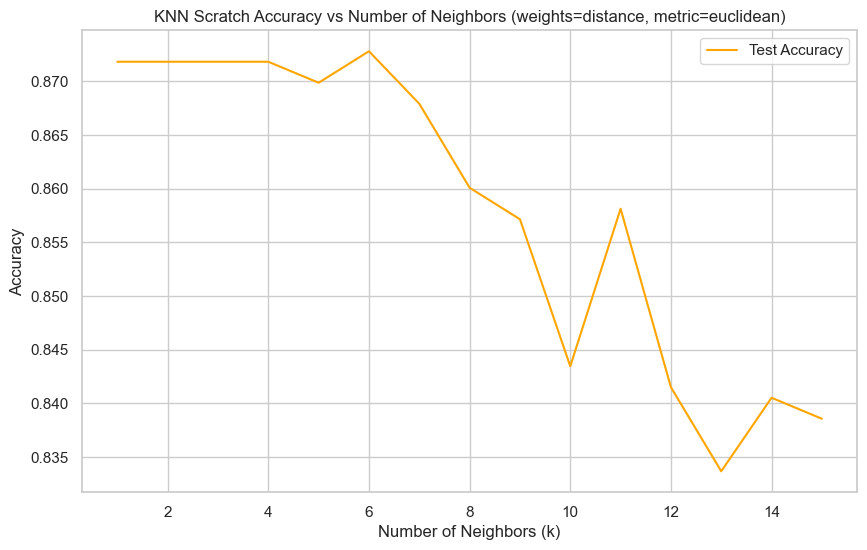

In [74]:
# Trực quan hóa accuracy theo n_neighbors
plt.figure(figsize=(10, 6))

plt.plot(n_neighbors_range, test_accuracies, label='Test Accuracy', linestyle='-', color='orange')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Scratch Accuracy vs Number of Neighbors (weights=distance, metric=euclidean)')
plt.legend()
plt.grid(True)
plt.show()

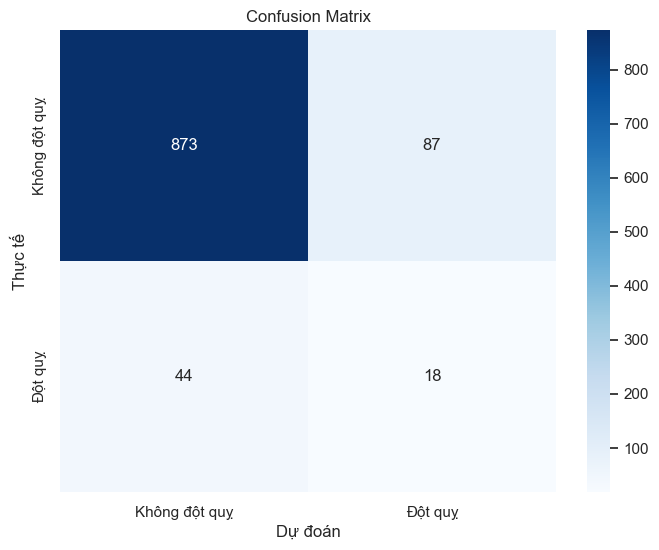

In [75]:
from matplotlib import pyplot as plt


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Không đột quỵ', 'Đột quỵ'],
            yticklabels=['Không đột quỵ', 'Đột quỵ'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix')
plt.show()

In [76]:
# Dự đoán cho mẫu mới
new_data_raw = pd.DataFrame({
    'age': [62.0],
    'hypertension': [0],
    'heart_disease': [1],
    'avg_glucose_level': [69.5],
    'bmi': [18.1],
    'gender': ['Male'],
    'smoking_status': ['smokes']
})




# Áp dụng preprocessor đã fit trên dữ liệu huấn luyện
new_data_processed = preprocessor.transform(new_data_raw)

# Chuẩn hóa với MinMaxScaler đã fit trên X_train
new_data_scaled = scaler_normal.transform(new_data_processed)

# Dự đoán cho mẫu mới
new_prediction = knn.predict(new_data_scaled)
print(f"Dự đoán cho mẫu mới: Stroke = {new_prediction[0]} (0: Không, 1: Có)")
new_data_processed = preprocessor.transform(new_data_raw)

Dự đoán cho mẫu mới: Stroke = 0 (0: Không, 1: Có)
